In [26]:
# Loading all needed packages at the start
import elastix 
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import os
import SimpleITK as sitk
import numpy as np

## Fill in your own paths in the cell below ##

In [2]:
# to Elastix.exe
ELASTIX_PATH = 'C:/Users/20183303/Documents/Jaar 5 - ME/Q3/CS in medische beeldanalyse/Elastix files/Elastix.exe'
el = elastix.ElastixInterface(elastix_path=ELASTIX_PATH)
# to Transformix.exe
TRANSFORMIX_PATH = 'C:/Users/20183303/Documents/Jaar 5 - ME/Q3/CS in medische beeldanalyse/Elastix files/Transformix.exe'
# to TrainingData
filepath_data = r'C:\Users\20183303\Documents\Jaar 5 - ME\Q3\CS in medische beeldanalyse\Image Registration Assignment\TrainingData'


### Load patient data and inspect

In [13]:
def loadPatientDataReadable(patient_nr, filepath):
    """ 
    The MR images and masks are loaded for the specified patient in a 3D array.
    
    input:
    patient_nr: str - choose which patient data to load (e.g. 'p102', 'p107', 'p108', etc.)
    filepath: str - path leading to where your data is stored
    
    output:
    loaded_mr: 3D array - MR images loaded
    loaded_mask: 3D array - masks loaded
    
    """
    file_p_mr = filepath+ '\{}\mr_bffe.mhd'.format(patient_nr)  # example of patient 102 input MR image
    file_p_mask = filepath+'\{}\prostaat.mhd'.format(patient_nr) # example of patient 102 segmentation mask

    # Convert so images can be inspected
    loaded_mr = imageio.imread(file_p_mr)
    loaded_mask = imageio.imread(file_p_mask)
    
    return loaded_mr, loaded_mask

In [21]:
loaded_mr_107, loaded_mask_107 = loadPatientDataReadable('p102', filepath=filepath_data) 
loaded_mr_108, loaded_mask_108 = loadPatientDataReadable('p108', filepath=filepath_data)

In [27]:
# Visualize the slices you want to inspect, together with segmentation mask
def visualizeSlices(loaded_mr_array, loaded_mask_array, range_slices, patient_nr_plot):
    """
    The slices specified will be shown for the MRI image and mask that are loaded.
    
    input: 
    loaded_mr_array: 3D array - MR images loaded
    loaded_mask_array: 3D array - masks loaded
    range_slices: int - which slices to inspect, starting at slice 0 # Clean up 
    patient_nr_plot: int - which patient is visualized 
    
    output:
    -
    
    """
    for i in range(range_slices):
        fig, ax = plt.subplots(1, 2, figsize=(7, 5))
        ax[0].imshow(loaded_mr_array[i,:,:], cmap='gray')
        ax[0].set_title('MR input image, \nslice {}, {}'.format(i, patient_nr_plot))
        ax[1].imshow(loaded_mask_array[i,:,:], cmap='gray')
        ax[1].set_title('Segmentation mask, \nslice {}, {}'.format(i, patient_nr_plot))
        plt.show()
        print('max value:', np.amax(loaded_mr_array, axis=0))

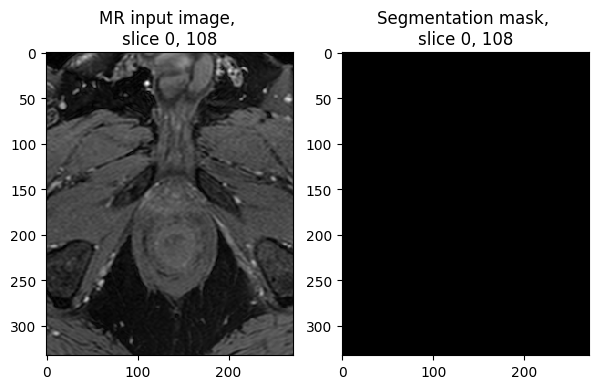

max value: [[ 807  772  753 ... 1365 1503 1647]
 [ 798  750  724 ... 1131 1339 1541]
 [ 714  692  689 ...  955 1153 1352]
 ...
 [ 916  942  984 ...  974  996 1022]
 [ 913  939  958 ...  980 1000 1028]
 [ 897  891  907 ... 1000 1035 1041]]


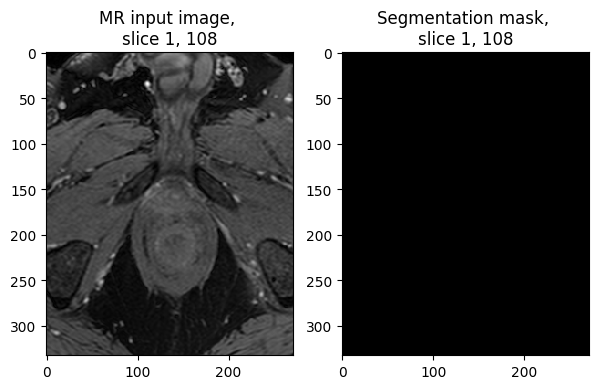

max value: [[ 807  772  753 ... 1365 1503 1647]
 [ 798  750  724 ... 1131 1339 1541]
 [ 714  692  689 ...  955 1153 1352]
 ...
 [ 916  942  984 ...  974  996 1022]
 [ 913  939  958 ...  980 1000 1028]
 [ 897  891  907 ... 1000 1035 1041]]


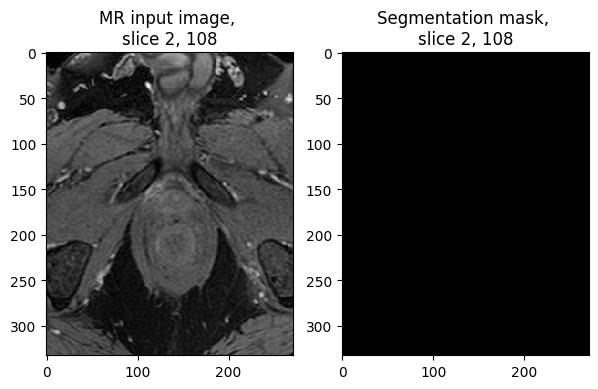

max value: [[ 807  772  753 ... 1365 1503 1647]
 [ 798  750  724 ... 1131 1339 1541]
 [ 714  692  689 ...  955 1153 1352]
 ...
 [ 916  942  984 ...  974  996 1022]
 [ 913  939  958 ...  980 1000 1028]
 [ 897  891  907 ... 1000 1035 1041]]


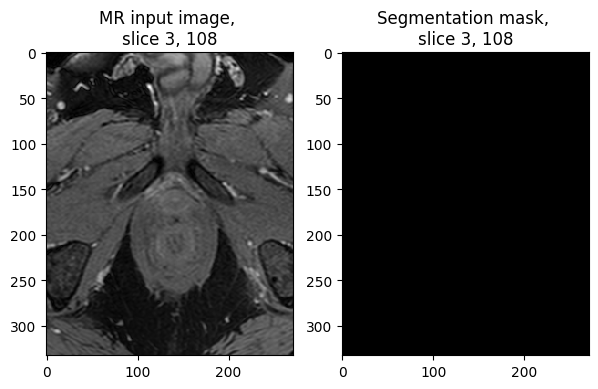

max value: [[ 807  772  753 ... 1365 1503 1647]
 [ 798  750  724 ... 1131 1339 1541]
 [ 714  692  689 ...  955 1153 1352]
 ...
 [ 916  942  984 ...  974  996 1022]
 [ 913  939  958 ...  980 1000 1028]
 [ 897  891  907 ... 1000 1035 1041]]


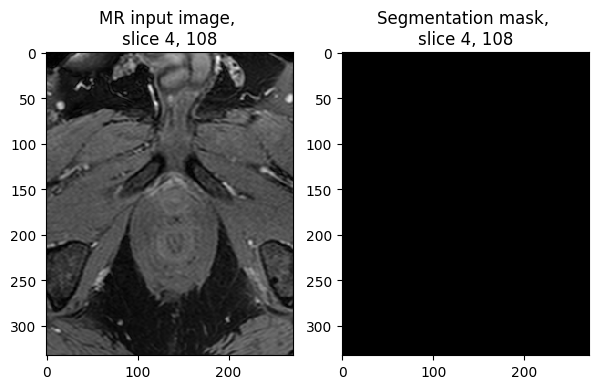

max value: [[ 807  772  753 ... 1365 1503 1647]
 [ 798  750  724 ... 1131 1339 1541]
 [ 714  692  689 ...  955 1153 1352]
 ...
 [ 916  942  984 ...  974  996 1022]
 [ 913  939  958 ...  980 1000 1028]
 [ 897  891  907 ... 1000 1035 1041]]


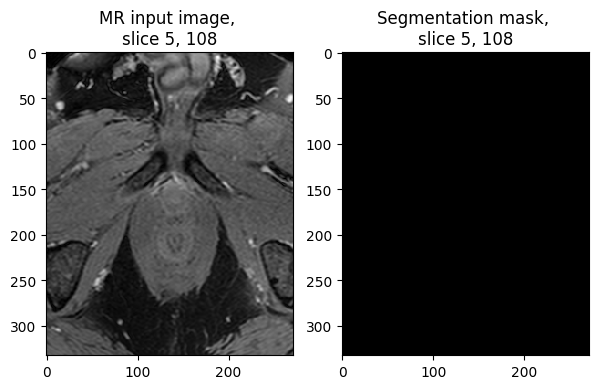

max value: [[ 807  772  753 ... 1365 1503 1647]
 [ 798  750  724 ... 1131 1339 1541]
 [ 714  692  689 ...  955 1153 1352]
 ...
 [ 916  942  984 ...  974  996 1022]
 [ 913  939  958 ...  980 1000 1028]
 [ 897  891  907 ... 1000 1035 1041]]


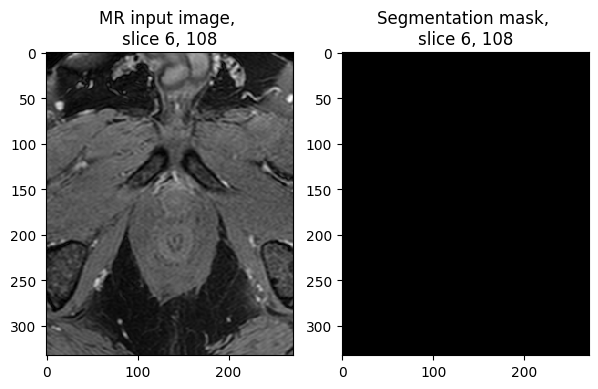

max value: [[ 807  772  753 ... 1365 1503 1647]
 [ 798  750  724 ... 1131 1339 1541]
 [ 714  692  689 ...  955 1153 1352]
 ...
 [ 916  942  984 ...  974  996 1022]
 [ 913  939  958 ...  980 1000 1028]
 [ 897  891  907 ... 1000 1035 1041]]


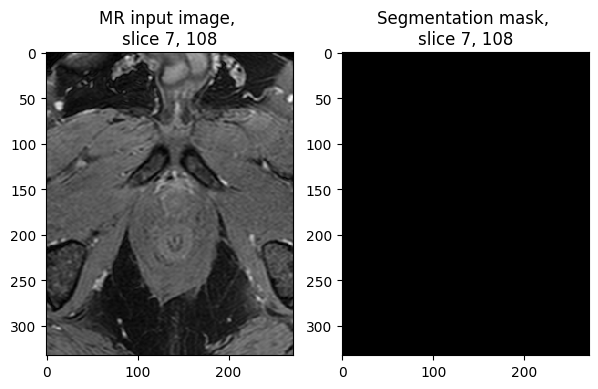

max value: [[ 807  772  753 ... 1365 1503 1647]
 [ 798  750  724 ... 1131 1339 1541]
 [ 714  692  689 ...  955 1153 1352]
 ...
 [ 916  942  984 ...  974  996 1022]
 [ 913  939  958 ...  980 1000 1028]
 [ 897  891  907 ... 1000 1035 1041]]


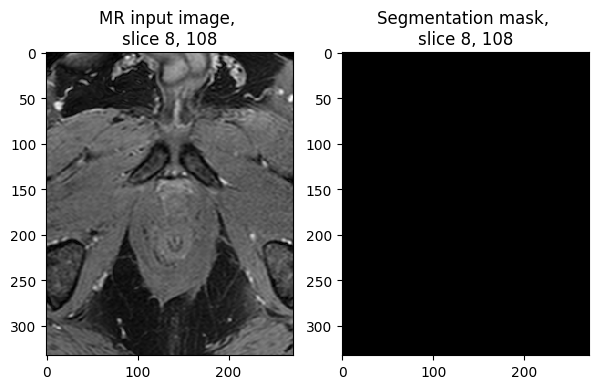

max value: [[ 807  772  753 ... 1365 1503 1647]
 [ 798  750  724 ... 1131 1339 1541]
 [ 714  692  689 ...  955 1153 1352]
 ...
 [ 916  942  984 ...  974  996 1022]
 [ 913  939  958 ...  980 1000 1028]
 [ 897  891  907 ... 1000 1035 1041]]


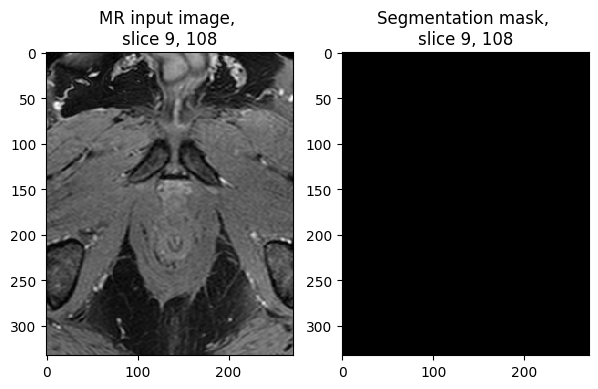

max value: [[ 807  772  753 ... 1365 1503 1647]
 [ 798  750  724 ... 1131 1339 1541]
 [ 714  692  689 ...  955 1153 1352]
 ...
 [ 916  942  984 ...  974  996 1022]
 [ 913  939  958 ...  980 1000 1028]
 [ 897  891  907 ... 1000 1035 1041]]


In [40]:
visualizeSlices(loaded_mr_108, loaded_mask_108, 10, 108)

### From here: calculate mutual information to find the 5 most similar slices


In [20]:
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'nearest'

Text(0.5, 1.0, 'Patient Y histogram')

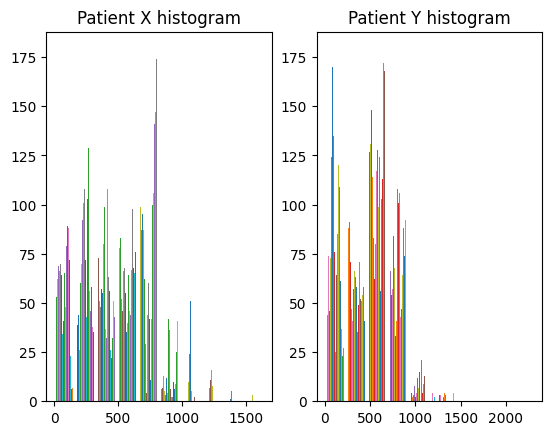

In [39]:
ig, axes = plt.subplots(1, 2)
axes[0].hist(loaded_mr_107[1,:,:], bins=10)
axes[0].set_title('Patient X histogram')
axes[1].hist(loaded_mr_108[1,:,:], bins=10)
axes[1].set_title('Patient Y histogram')
# Maybe make nicer looking, but it is just for ourselves

0.9440726943373042


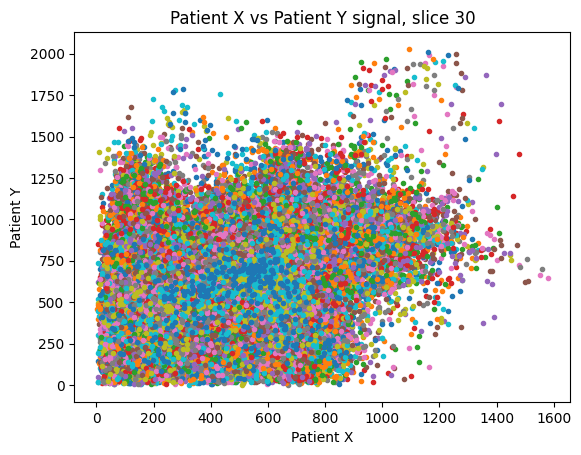

0.9481616578929087


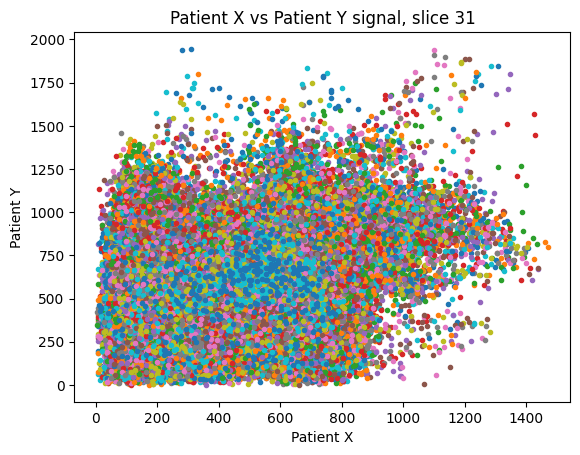

0.9374283067159082


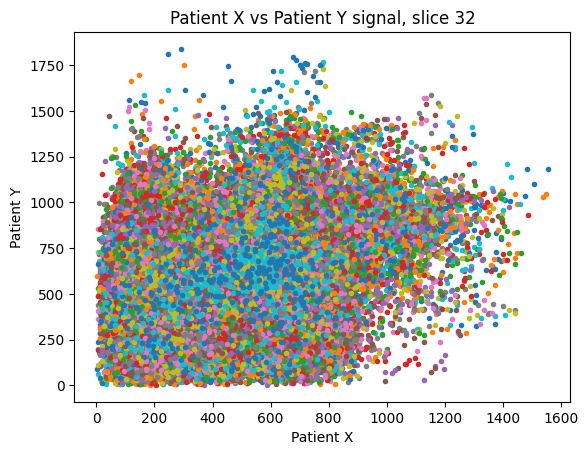

0.9343484670700548


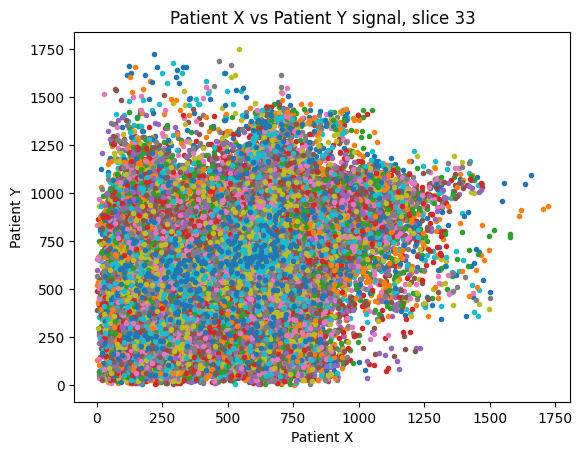

0.9416290865150418


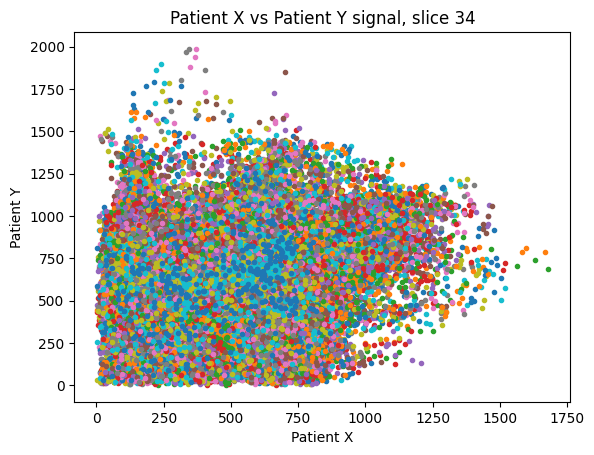

0.9389984208578547


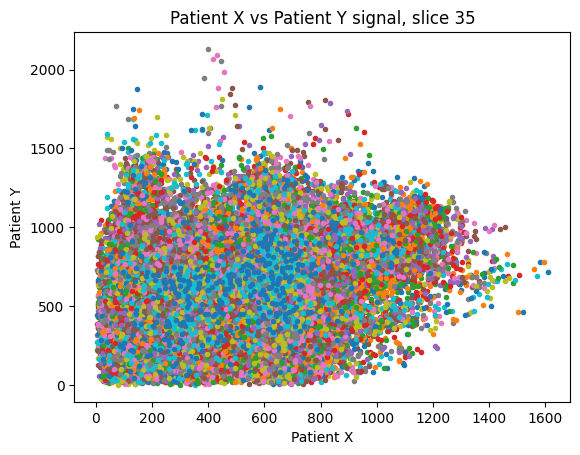

0.9320991576762357


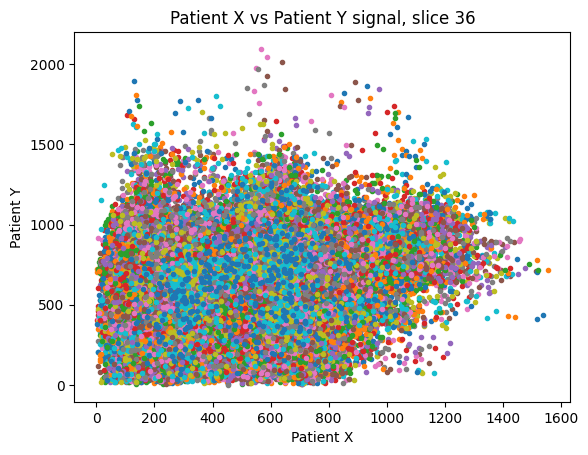

0.9362878308278256


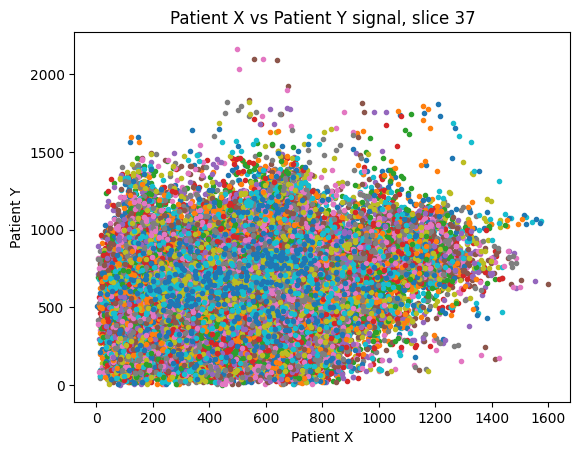

0.9450018451648857


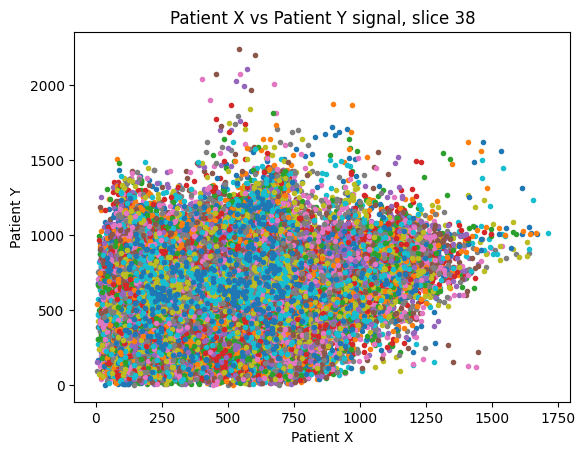

0.9589204148874302


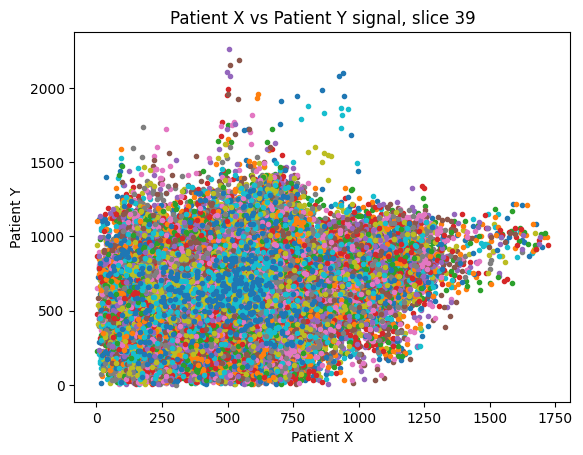

In [49]:
for slice_nr_plot in range(30,40):
    plt.plot(loaded_mr_107[slice_nr_plot,:,:], loaded_mr_108[slice_nr_plot,:,:], '.')
    plt.xlabel('Patient X')
    plt.ylabel('Patient Y')
    plt.title('Patient X vs Patient Y signal, slice {}'.format(slice_nr_plot))
    print(np.corrcoef(loaded_mr_107[slice_nr_plot,:,:], loaded_mr_108[slice_nr_plot,:,:])[0, 1])
    plt.show()

0.3451689399258301


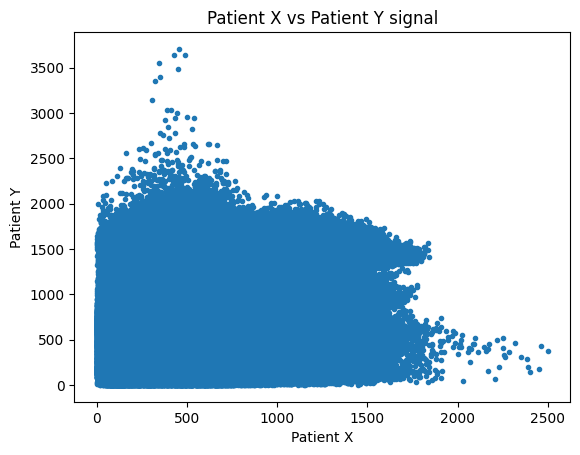

In [63]:
# For all slices
plt.plot(loaded_mr_107.ravel(), loaded_mr_108.ravel(), '.')
plt.xlabel('Patient X')
plt.ylabel('Patient Y')
plt.title('Patient X vs Patient Y signal')
print(np.corrcoef(loaded_mr_107.ravel(), loaded_mr_108.ravel())[0, 1])


Text(0, 0.5, 'Patient Y signal bin')

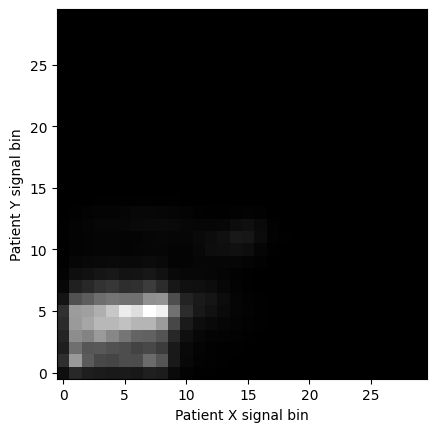

In [73]:
hist_2d, x_edges, y_edges = np.histogram2d(loaded_mr_107.ravel(),loaded_mr_108.ravel(),bins=30)
# Plot as image, arranging axes as for scatterplot
# We transpose to put the T1 bins on the horizontal axis
# and use 'lower' to put 0, 0 at the bottom of the plot
plt.imshow(hist_2d.T, origin='lower')
plt.xlabel('Patient X signal bin')
plt.ylabel('Patient Y signal bin')

In [74]:
def mutual_information(hgram):
    """ Mutual information for joint histogram
    """
    # Convert bins counts to probability values
    pxy = hgram / float(np.sum(hgram))
    px = np.sum(pxy, axis=1) # marginal for x over y
    py = np.sum(pxy, axis=0) # marginal for y over x
    px_py = px[:, None] * py[None, :] # Broadcast to multiply marginals
    # Now we can do the calculation using the pxy, px_py 2D arrays
    nzs = pxy > 0 # Only non-zero pxy values contribute to the sum
    return np.sum(pxy[nzs] * np.log(pxy[nzs] / px_py[nzs]))

In [75]:
mutual_information(hist_2d)

0.08980070667800186

In [6]:
## Try out some transformation with elastix, bspline multires parameters file

In [5]:
parameter_file_path_experiment = os.path.join(filepath_data,'parameters_bspline_multires_MR.txt')
output_file_path_experiment = os.path.join(filepath_data,'results')

fixed_image_path = filepath_data+'\p107\mr_bffe.mhd'
moving_image_path = filepath_data+'\p102\mr_bffe.mhd'

print(parameter_file_path_experiment)

C:\Users\20183303\Documents\Jaar 5 - ME\Q3\CS in medische beeldanalyse\Image Registration Assignment\TrainingData\parameters_bspline_multires_MR.txt


In [6]:
el.register(
    fixed_image=fixed_image_path,
    moving_image=moving_image_path,
    parameters=[parameter_file_path_experiment],
    output_dir=output_file_path_experiment)

C:/Users/20183303/Documents/Jaar 5 - ME/Q3/CS in medische beeldanalyse/Elastix files/Elastix.exe -f C:\Users\20183303\Documents\Jaar 5 - ME\Q3\CS in medische beeldanalyse\Image Registration Assignment\TrainingData\p107\mr_bffe.mhd -m C:\Users\20183303\Documents\Jaar 5 - ME\Q3\CS in medische beeldanalyse\Image Registration Assignment\TrainingData\p102\mr_bffe.mhd -p C:\Users\20183303\Documents\Jaar 5 - ME\Q3\CS in medische beeldanalyse\Image Registration Assignment\TrainingData\parameters_bspline_multires_MR.txt -out C:\Users\20183303\Documents\Jaar 5 - ME\Q3\CS in medische beeldanalyse\Image Registration Assignment\TrainingData\results


In [7]:
itk_image_fixed = sitk.ReadImage(fixed_image_path)
image_array_fixed = sitk.GetArrayFromImage(itk_image_fixed)
itk_image_moving = sitk.ReadImage(moving_image_path)
image_array_moving = sitk.GetArrayFromImage(itk_image_moving)

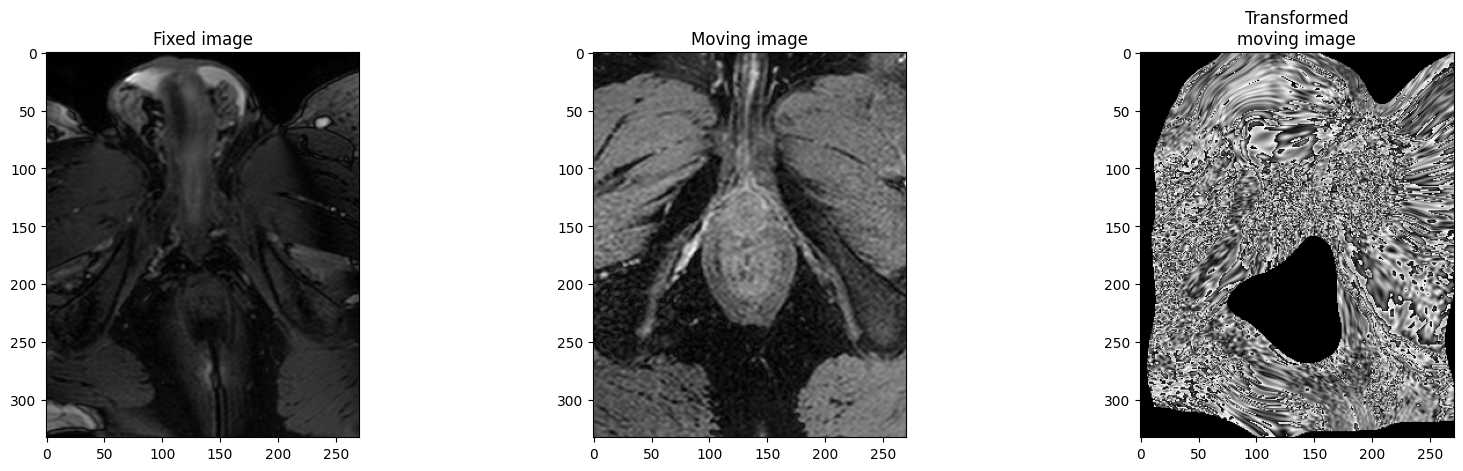

In [8]:
result_path_experiment = os.path.join(output_file_path_experiment, 'result.0.tiff')

transformed_moving_image = imageio.imread(result_path_experiment)

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].imshow(image_array_fixed[10,:,:], cmap='gray')
ax[0].set_title('Fixed image')
ax[1].imshow(image_array_moving[10,:,:], cmap='gray')
ax[1].set_title('Moving image')
ax[2].imshow(transformed_moving_image[10,:,:], cmap='gray')
ax[2].set_title('Transformed\nmoving image')

plt.show()